In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
PATH="/content/drive/My Drive/dataset_binary/dataset_binary/"

In [0]:
bs = 16 #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
#PATH = './Monkeys Faces/'

Let's retrieve the image classes,

In [6]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes)            

There are  3 classes:
 ['abnormal', 'normal', 'models']


Let's verify there are not any corrupt images that cannot be read. If found any, they will simply be deleted.

Class: abnormal


Class: normal


Class: models


/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:105: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


In [0]:
tfms=get_transforms(do_flip=True,flip_vert=True, max_rotate=90,max_zoom=1.1, max_lighting=0.2)
data  = ImageDataBunch.from_folder(PATH, ds_tfms=tfms, size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)

In [8]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 734 training images and 183 validation images.


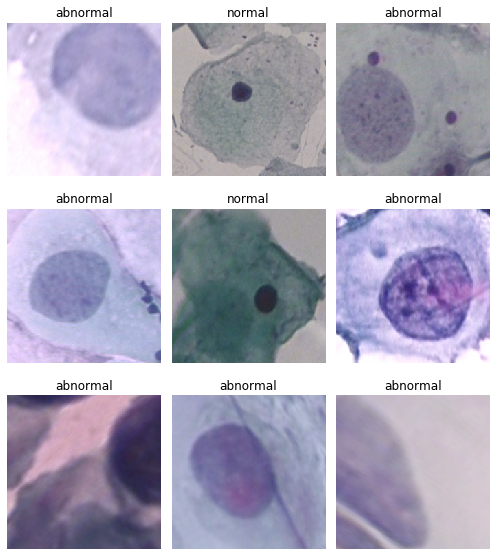

In [9]:
data.show_batch(rows=3, figsize=(7,8))

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 143MB/s] 


Let's now pick the appropriate learning rate parameter,

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


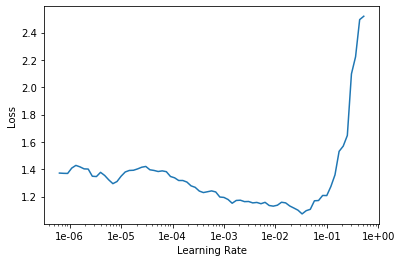

In [11]:
learn.lr_find();
learn.recorder.plot()

In [12]:
from fastai.callbacks import *
learn.fit_one_cycle(20, max_lr=slice(5e-4,5e-3),callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name='binarybest')])

epoch,train_loss,valid_loss,accuracy,time
0,1.022104,0.545981,0.830601,00:35
1,0.834313,0.579219,0.863388,00:09
2,0.706984,0.468887,0.808743,00:09
3,0.628654,0.394757,0.863388,00:09
4,0.499196,0.333402,0.896175,00:09
5,0.435496,0.376716,0.890710,00:09
6,0.381932,0.287426,0.896175,00:09
7,0.393399,0.402119,0.852459,00:09
8,0.385935,0.241038,0.918033,00:09
9,0.366517,0.223403,0.918033,00:09


Better model found at epoch 0 with accuracy value: 0.8306010961532593.
Better model found at epoch 1 with accuracy value: 0.8633880019187927.
Better model found at epoch 4 with accuracy value: 0.8961748480796814.
Better model found at epoch 8 with accuracy value: 0.9180327653884888.
Better model found at epoch 10 with accuracy value: 0.9234972596168518.
Better model found at epoch 12 with accuracy value: 0.9453551769256592.
Better model found at epoch 13 with accuracy value: 0.9562841653823853.
Better model found at epoch 16 with accuracy value: 0.9617486596107483.
Better model found at epoch 18 with accuracy value: 0.9726775884628296.
Better model found at epoch 19 with accuracy value: 0.9781420826911926.


In [13]:
interp = ClassificationInterpretation.from_learner(learn)


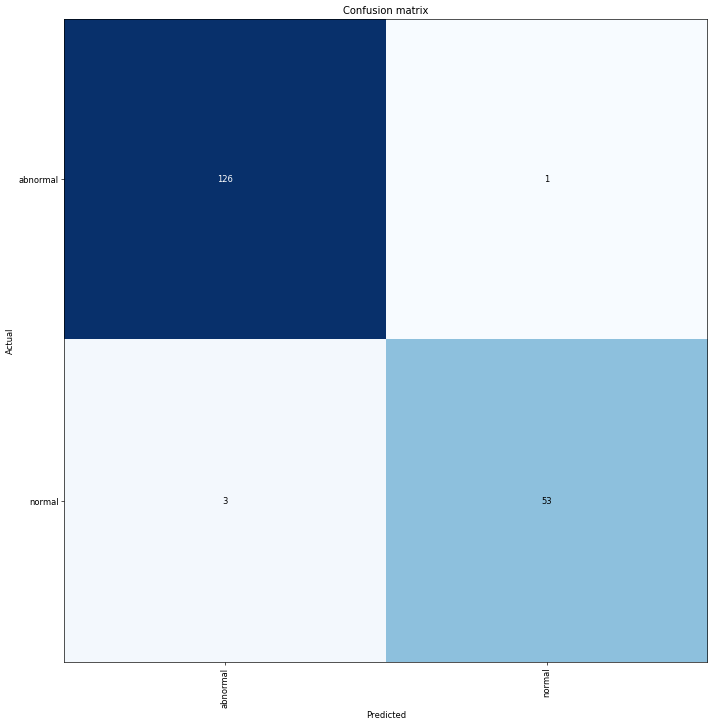

In [14]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

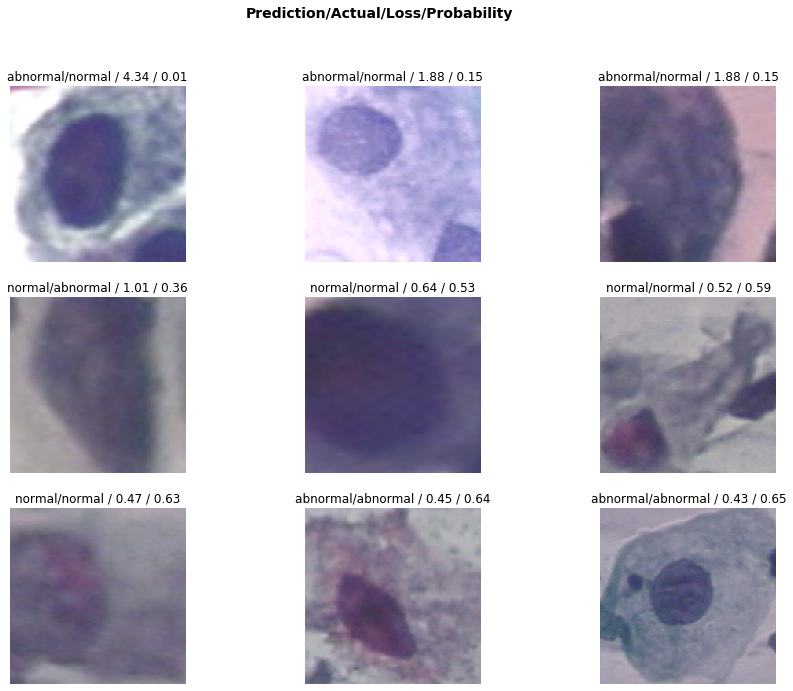

In [15]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

/content/drive/My Drive/dataset_binary/dataset_binary/normal/209522940-209522991-001.BMP
It is a normal


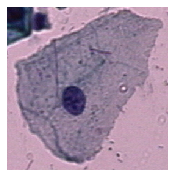

In [16]:
path = '/content/drive/My Drive/dataset_binary/dataset_binary/normal/'  #The path of your test image
print(get_image_files(path)[25])
img = open_image(get_image_files(path)[25])
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("It is a", pred_class)

/content/drive/My Drive/dataset_binary/dataset_binary/abnormal/153314956-153314996-001.BMP
It is a abnormal


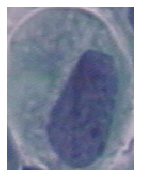

In [17]:
path = '/content/drive/My Drive/dataset_binary/dataset_binary/abnormal/'  #The path of your test image
print(get_image_files(path)[15])
img = open_image(get_image_files(path)[15])
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("It is a", pred_class)

/content/drive/My Drive/dataset_binary/dataset_binary/abnormal/149056321-149056360-001.BMP
It is a abnormal


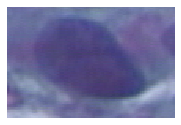

In [0]:
path = '/content/drive/My Drive/dataset_binary/dataset_binary/abnormal/'  #The path of your test image
print(get_image_files(path)[20])
img = open_image(get_image_files(path)[20])
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("It is a", pred_class)

In [0]:
learn.load('binarybest')

Learner(data=ImageDataBunch;

Train: LabelList (734 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
abnormal,abnormal,abnormal,abnormal,abnormal
Path: /content/drive/My Drive/dataset_binary/dataset_binary;

Valid: LabelList (183 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
normal,abnormal,abnormal,abnormal,abnormal
Path: /content/drive/My Drive/dataset_binary/dataset_binary;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1,

In [0]:
log_preds, y_pred= learn.TTA()

In [0]:
y_pred

tensor([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [0]:
preds,y = learn.get_preds()

In [0]:
data

ImageDataBunch;

Train: LabelList (734 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
abnormal,abnormal,abnormal,abnormal,abnormal
Path: /content/drive/My Drive/dataset_binary/dataset_binary;

Valid: LabelList (183 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
normal,abnormal,abnormal,abnormal,abnormal
Path: /content/drive/My Drive/dataset_binary/dataset_binary;

Test: None

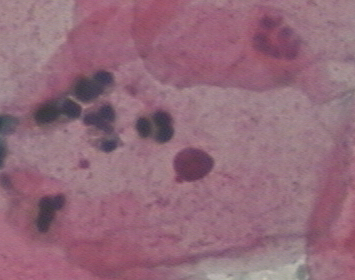

In [0]:
data.valid_ds.x[0]


In [0]:
data.valid_ds.y[0]

Category normal